In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dataset = pd.DataFrame(iris.data,columns=iris.feature_names)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
dataset['target'] = iris.target
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
dataset['flower_name'] = dataset.target.apply(lambda x : iris.target_names[x])
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [5]:
df0 = dataset[dataset.target==0]
df1 = dataset[dataset.target==1]
df2 = dataset[dataset.target==2]

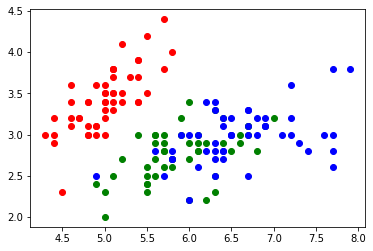

In [6]:
import matplotlib.pyplot as plt
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue')

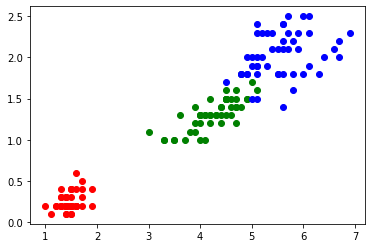

In [7]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue')

In [8]:
from sklearn.model_selection import train_test_split
x = dataset.drop(['target','flower_name'],axis='columns')
y = dataset.target

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [10]:
#Create KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
nb= KNeighborsClassifier(n_neighbors=3)
nb.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
nb.score(x_test,y_test)

0.9555555555555556

In [13]:
y_predicted = nb.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)

In [15]:
import seaborn as sn

<AxesSubplot:>

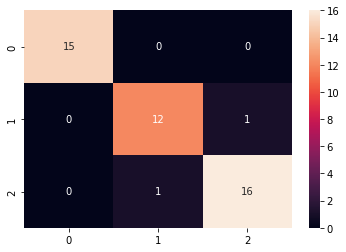

In [16]:
sn.heatmap(cm,annot=True)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.92      0.92        13
           2       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

